# ANÁLISE EXPLORATÓRIA DE DADOS

Nesta análise, será utilizado o dataset de treino do desafio "Machine Learning from Disaster" da plataforma Kaggle. 
A modelagem de dados é feita em Python, mas como a apresentação será feita em PPT, decidiu-se por desenvolver a parte visual na própria ferramenta utilizando a extensão Mekko Graphics.

Dataset utilizado: https://www.kaggle.com/c/titanic

# 1.0 Importando as bibliotecas

In [1]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

sns.set()

# 2.0 Importando o dataset

In [2]:
df = pd.read_csv('Base de Dados/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

# 3.0 Data Wrangling

In [8]:
df = df.drop(columns=['PassengerId','Name','Ticket'], axis=1)

In [5]:
# verificando o tipo dos dados

df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
# missing values

df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1.0, 'Distribuição das idades - Treino')

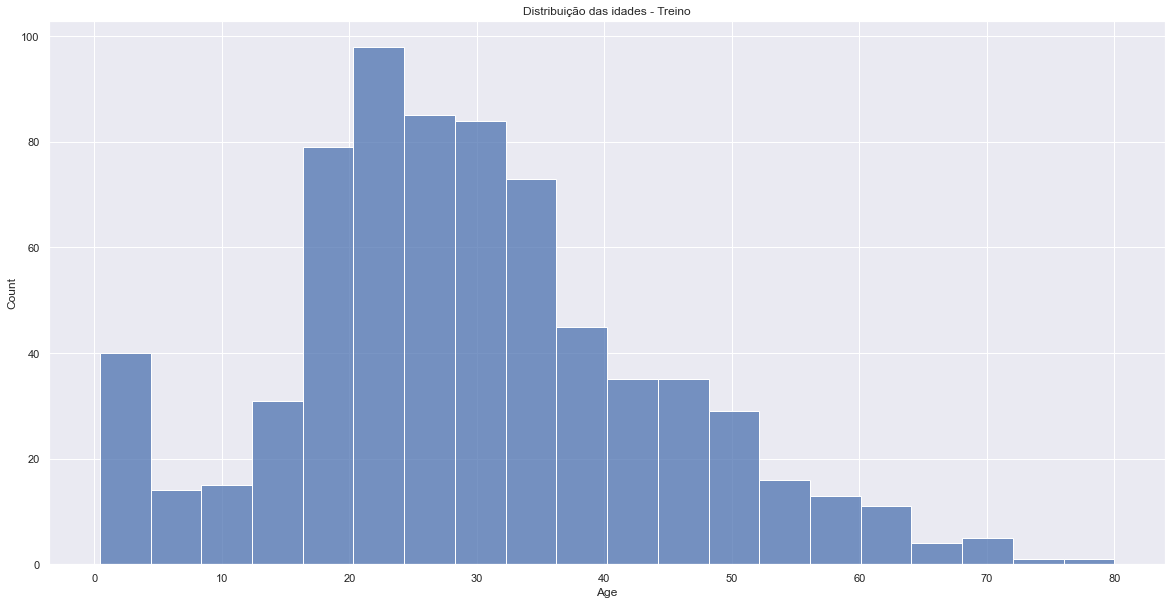

In [10]:
plt.figure(figsize=(20,10))


sns.histplot(df['Age'])
plt.title('Distribuição das idades - Treino')


Diante da distribuição da variável 'Age', aparentando não ser uma distribuição normal, decidiu-se por preencher os missing values com o valor da sua mediana.

In [11]:
idade_mediana = df['Age'].median()

df['Age'] = df['Age'].fillna(idade_mediana)

In [12]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [13]:
# verificando dados nulos

df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [14]:
df = df.drop(columns=['Cabin'], axis=1)


In [15]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [16]:
common_value = 'S'


df['Embarked'] = df['Embarked'].fillna(common_value)

In [17]:
# checando se não existem dados estranhos

df['Age'].min(), df['Age'].max()

(0.42, 80.0)

In [18]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# 4.0 Análise Exploratória de Dados

## 4.1 Gênero

In [19]:
df['Person'] = 1

In [20]:
genero = df[['Sex', 'Survived', 'Person']].groupby(['Sex', 'Survived']).sum().reset_index()
genero.to_excel('Resultados/genero.xlsx', index=False)
genero

,Sex,Survived,Person
0,female,0,81
1,female,1,233
2,male,0,468
3,male,1,109


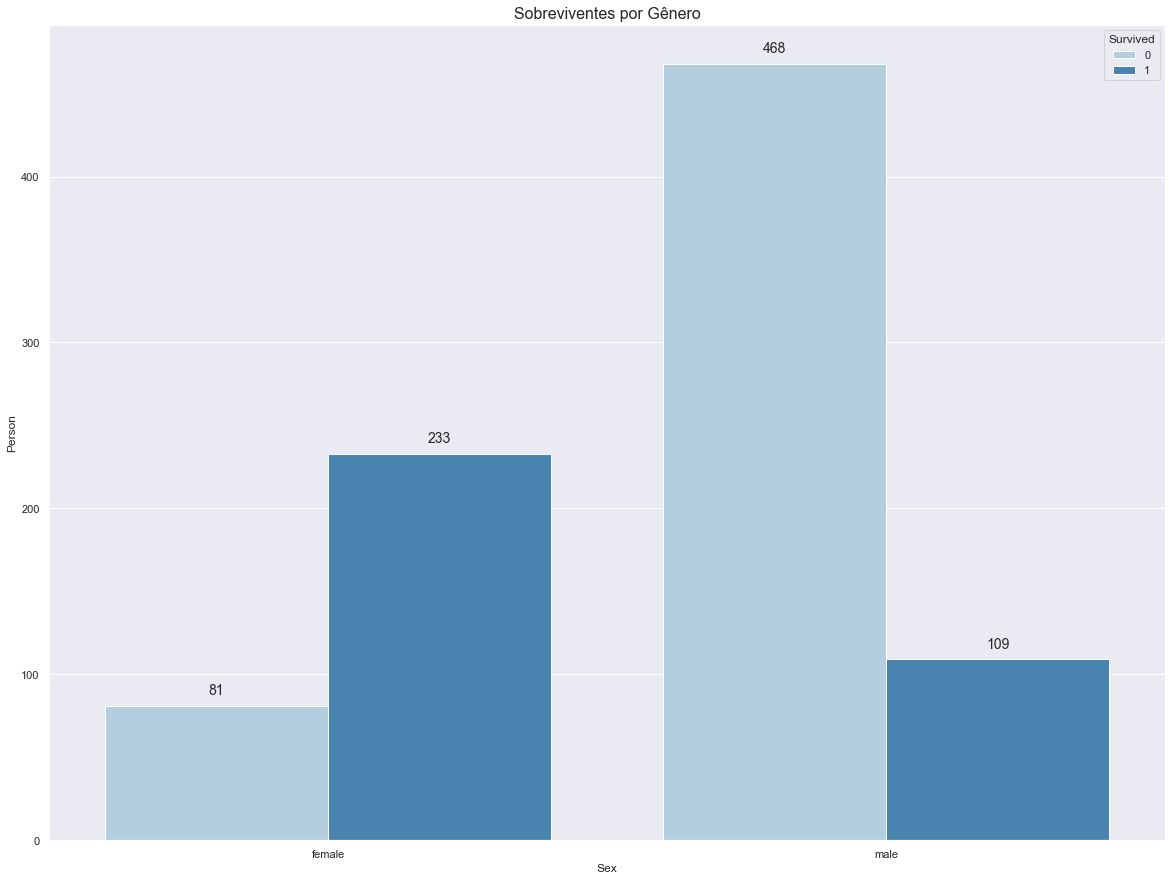

In [21]:
plt.figure(figsize=(20,15))

plt.title('Sobreviventes por Gênero', fontsize=16)
ax = sns.barplot(x='Sex', y='Person', data=genero, hue='Survived', palette='Blues')


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 15), size=14, textcoords = 'offset points')


## 4.2 Idade

In [22]:
labels = pd.DataFrame(df['Age'].drop_duplicates())

labels['cat_age'] = pd.qcut(labels['Age'].drop_duplicates(), 10)

In [23]:
df = df.merge(labels, on='Age', how='left')

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Person,cat_age
0,0,3,male,22.0,1,0,7.2500,S,1,"(20.55, 26.8]"
1,1,1,female,38.0,1,0,71.2833,C,1,"(32.75, 39.2]"
2,1,3,female,26.0,0,0,7.9250,S,1,"(20.55, 26.8]"
3,1,1,female,35.0,1,0,53.1000,S,1,"(32.75, 39.2]"
4,0,3,male,35.0,0,0,8.0500,S,1,"(32.75, 39.2]"


In [24]:
df = df.sort_values('cat_age')

In [25]:
idade = df[['cat_age','Survived','Person']].groupby(['cat_age', 'Survived']).sum().reset_index()

idade.to_excel('Resultados/idade.xlsx', index=False)

idade.head()

,cat_age,Survived,Person
0,"(0.419, 4.7]",0,13
1,"(0.419, 4.7]",1,27
2,"(4.7, 13.4]",0,16
3,"(4.7, 13.4]",1,15
4,"(13.4, 20.55]",0,69


## 4.3 Irmãos e Cônjuges

In [28]:
irmaos_conjuges = df[['SibSp','Survived','Person']].groupby(['SibSp', 'Survived']).sum().reset_index()

irmaos_conjuges.to_excel('Resultados/irmaos_conjuges.xlsx', index=False)

irmaos_conjuges

,SibSp,Survived,Person
0,0,0,398
1,0,1,210
2,1,0,97
3,1,1,112
4,2,0,15
5,2,1,13
6,3,0,12
7,3,1,4
8,4,0,15
9,4,1,3


## 4.4 Pais e Filhos

In [29]:
pais_filhos = df[['Parch','Survived','Person']].groupby(['Parch', 'Survived']).sum().reset_index()

pais_filhos.to_excel('Resultados/pais_filhos.xlsx', index=False)

pais_filhos

,Parch,Survived,Person
0,0,0,445
1,0,1,233
2,1,0,53
3,1,1,65
4,2,0,40
5,2,1,40
6,3,0,2
7,3,1,3
8,4,0,4
9,5,0,4


## 4.5 Tarifa de Passagem

In [30]:
labels = pd.DataFrame(df['Fare'].drop_duplicates())

labels['cat_fare'] = pd.qcut(labels['Fare'].drop_duplicates(), 10)

In [31]:
df = df.merge(labels, on='Fare', how='left')

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Person,cat_age,cat_fare
0,1,1,male,4.0,0,2,81.8583,S,1,"(0.419, 4.7]","(60.465, 84.383]"
1,1,2,male,1.0,2,1,39.0000,S,1,"(0.419, 4.7]","(28.543, 39.36]"
2,0,3,male,4.0,3,2,27.9000,S,1,"(0.419, 4.7]","(21.038, 28.543]"
3,0,3,male,4.0,4,1,29.1250,Q,1,"(0.419, 4.7]","(28.543, 39.36]"
4,1,2,female,2.0,1,1,26.0000,S,1,"(0.419, 4.7]","(21.038, 28.543]"


In [32]:
tarifa = df[['cat_fare','Survived','Person']].groupby(['cat_fare', 'Survived']).sum().reset_index()

tarifa.to_excel('Resultados/tarifa.xlsx', index=False)

tarifa.head()

,cat_fare,Survived,Person
0,"(-0.001, 7.702]",0,83
1,"(-0.001, 7.702]",1,14
2,"(7.702, 8.416]",0,149
3,"(7.702, 8.416]",1,45
4,"(8.416, 11.144]",0,56


## 4. Local de Embarque

In [34]:
local_embarque = df[['Embarked','Survived','Person']].groupby(['Embarked', 'Survived']).sum().reset_index()

local_embarque.to_excel('Resultados/local_embarque.xlsx', index=False)

local_embarque

,Embarked,Survived,Person
0,C,0,75
1,C,1,93
2,Q,0,47
3,Q,1,30
4,S,0,427
5,S,1,219
